## Video Games Sales Data

In [2]:
# importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import scipy.stats as st
from sklearn import ensemble, tree, linear_model

## Read Data

This dataset contains a list of video games with sales greater than 100,000 copies.

Fields include:

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

## Importing Data

In [8]:
# reading the data set
missing_values = ["n/a", "na", "--", "N/A"]
vg_sales = pd.read_csv("video_games_sales.csv", na_values = missing_values)
vg_sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


--

--

# Check first 5 rows

In [81]:
vg_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Check last 5 rows

In [83]:
vg_sales.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


--

--

# Check Data Info

In [85]:
vg_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16598 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 2.1+ MB


--

--

## Understanding the data set

In [11]:
# what are the numerical features?
numfeat = vg_sales.select_dtypes(include=[np.number])
numfeat.columns

Index(['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')

In [12]:
# list of variables that contain datetime information
year_feature = [feature for feature in numfeat if 'Yr' in feature or 'Year' in feature]
year_feature

['Year']

In [13]:
# what are the unique years in 'Year'
for feature in year_feature:
    print(feature, vg_sales[feature].unique())

Year [ 2006.  1985.  2008.  2009.  1996.  1989.  1984.  2005.  1999.  2007.
  2010.  2013.  2004.  1990.  1988.  2002.  2001.  2011.  1998.  2015.
  2012.  2014.  1992.  1997.  1993.  1994.  1982.  2003.  1986.  2000.
    nan  1995.  2016.  1991.  1981.  1987.  1980.  1983.  2020.  2017.]


In [14]:
# what are the categorical features?
catfeat = vg_sales.select_dtypes(include=[np.object])
catfeat.columns

Index(['Name', 'Platform', 'Genre', 'Publisher'], dtype='object')

In [15]:
# unique elements in categorical features
 
for column_name in vg_sales.columns:
    if vg_sales[column_name].dtypes == 'object':
        vg_sales[column_name] = vg_sales[column_name].fillna(vg_sales[column_name].mode().iloc[0])
        unique_category = len(vg_sales[column_name].unique())
        print("Features in vg_sales dataset '{column_name}' has '{unique_category}' unique categories".format(column_name = column_name, unique_category=unique_category))

Features in vg_sales dataset 'Name' has '11493' unique categories
Features in vg_sales dataset 'Platform' has '31' unique categories
Features in vg_sales dataset 'Genre' has '12' unique categories
Features in vg_sales dataset 'Publisher' has '578' unique categories


## Remove Missing Data

In [ ]:
# cleaning the data 
missing_values = ["n/a", "na", "--", "N/A"]
vg_sales = pd.read_csv(r"vgsaless.csv", na_values = missing_values)
vg_sales

In [ ]:
#shows missing datanull_data
null_data = vgsales[vgsales.isnull().any(axis=1)]
null_data

## Remove Missing Data from Year and Publisher

In [ ]:
# removing all the nan in 'Year'
vg_sales.dropna(subset=['Year'], inplace=True)
print (vg_sales)

In [19]:
# removing all the nan in 'Publisher'
vg_sales.dropna(subset=['Publisher'], inplace=True)
print (vg_sales)

        Rank                                               Name Platform  \
0          1                                         Wii Sports      Wii   
1          2                                  Super Mario Bros.      NES   
2          3                                     Mario Kart Wii      Wii   
3          4                                  Wii Sports Resort      Wii   
4          5                           Pokemon Red/Pokemon Blue       GB   
5          6                                             Tetris       GB   
6          7                              New Super Mario Bros.       DS   
7          8                                           Wii Play      Wii   
8          9                          New Super Mario Bros. Wii      Wii   
9         10                                          Duck Hunt      NES   
10        11                                         Nintendogs       DS   
11        12                                      Mario Kart DS       DS   
12        13

## Sum of missing values

In [18]:
# checking if nan was dropped
vg_sales.isnull().sum() 

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

## DATA VISUALIZATION, QUESTIONS AND INSIGHTS FROM VISUALIZATIONS

### I. WHICH GENRES OF GAMES WERE MADE THE MOST?

In [20]:
#Showing the genre of the most made games in descending order with the most frequent games released 
vg_sales['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

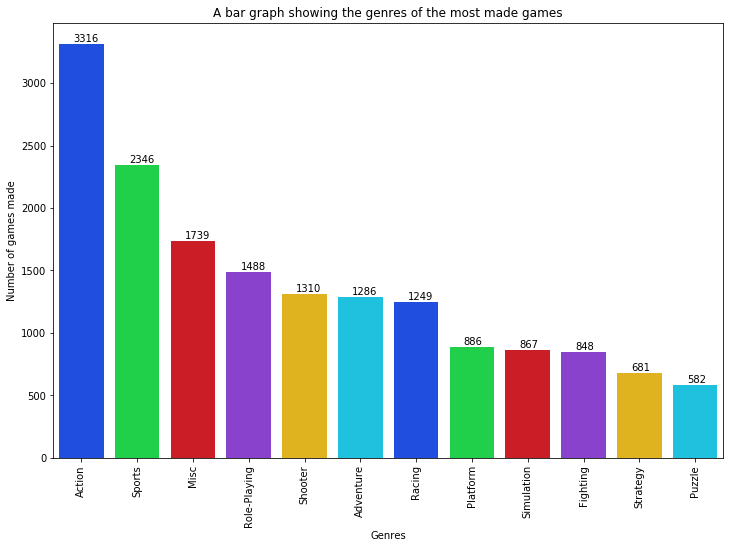

In [22]:
#figsize 12, 8 means the width is 12" and the height is in 8"
#countplot in sns is a bar graph which shows the relationships between data and their numerical values
#order sorts the data out with the most played game showing first, second game played follows in that order

plt.figure(figsize=(12, 8)) 
bar_pl = sns.countplot(x="Genre", data=vg_sales, order = vg_sales['Genre'].value_counts().index, palette= 'bright') 

#Shows the angle at which the labels on the x-axis should be displayed
plt.xticks(rotation=90) 

for p in bar_pl.patches:
    bar_pl.annotate(str(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')
    
plt.title('A bar graph showing the genres of the most made games')
plt.xlabel('Genres')
plt.ylabel('Number of games made')

plt.show()

### fig 1 above shows that action games were released frequently, followed by sports and misc.

### II. WHICH GENRES HAD THE HIGHEST UNITS SALES FOR EACH REGION?

In [23]:
vg_sales.groupby(by=['Genre'])['NA_Sales'].sum().reset_index().sort_values(by=['NA_Sales'], ascending=False)

,Genre,NA_Sales
0,Action,877.83
10,Sports,683.35
8,Shooter,582.60
4,Platform,447.05
3,Misc,410.24
6,Racing,359.42
7,Role-Playing,327.28
2,Fighting,223.59
9,Simulation,183.31
5,Puzzle,123.78


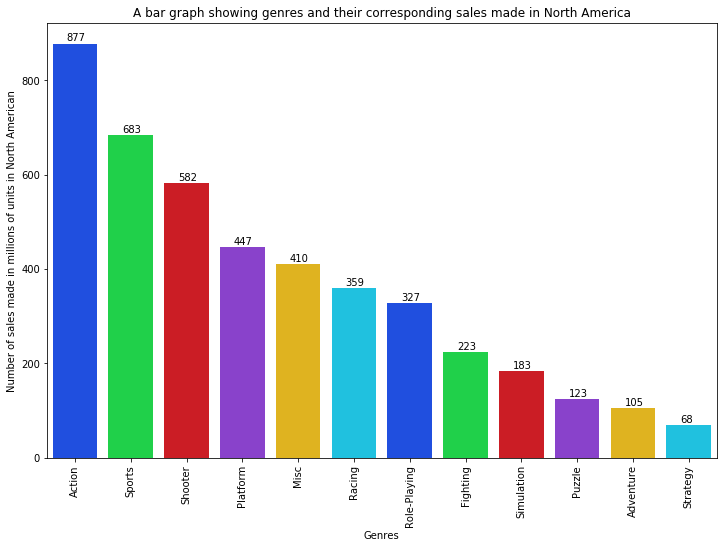

In [24]:
plt.figure(figsize=(12, 8)) 
bar_pl = sns.barplot(x="Genre", y ='NA_Sales', data=vg_sales.groupby(by=['Genre'])['NA_Sales'].sum().reset_index().sort_values(by=['NA_Sales'], ascending=False), palette= 'bright') 

#Shows the angle at which the labels on the x-axis should be displayed
plt.xticks(rotation=90) 

for p in bar_pl.patches:
    bar_pl.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
    

plt.title('A bar graph showing genres and their corresponding sales made in North America')
plt.xlabel('Genres')
plt.ylabel('Number of sales made in millions of units in North American')

plt.show()

### Action games had the highest unit sales in North America

In [ ]:
vg_sales.groupby(by=['Genre'])['EU_Sales'].sum().reset_index().sort_values(by=['EU_Sales'], ascending=False)

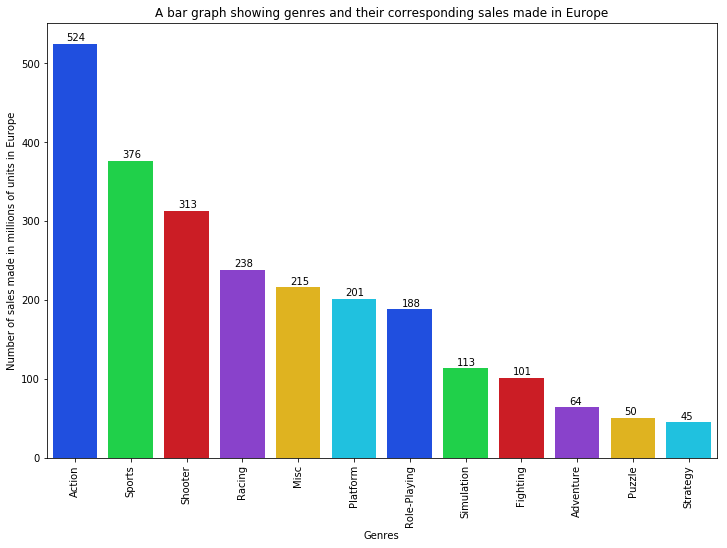

In [25]:
plt.figure(figsize=(12, 8)) 
bar_pl = sns.barplot(x="Genre", y ='EU_Sales', data=vg_sales.groupby(by=['Genre'])['EU_Sales'].sum().reset_index().sort_values(by=['EU_Sales'], ascending=False), palette= 'bright') 

#Shows the angle at which the labels on the x-axis should be displayed
plt.xticks(rotation=90) 

for p in bar_pl.patches:
    bar_pl.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
    

plt.title('A bar graph showing genres and their corresponding sales made in Europe')
plt.xlabel('Genres')
plt.ylabel('Number of sales made in millions of units in Europe')

plt.show()

### Action games had the highest unit sales in Europe

In [26]:
vg_sales.groupby(by=['Genre'])['JP_Sales'].sum().reset_index().sort_values(by=['JP_Sales'], ascending=False)

,Genre,JP_Sales
7,Role-Playing,352.31
0,Action,159.95
10,Sports,135.37
4,Platform,130.77
3,Misc,107.76
2,Fighting,87.35
9,Simulation,63.70
5,Puzzle,57.31
6,Racing,56.69
1,Adventure,52.07


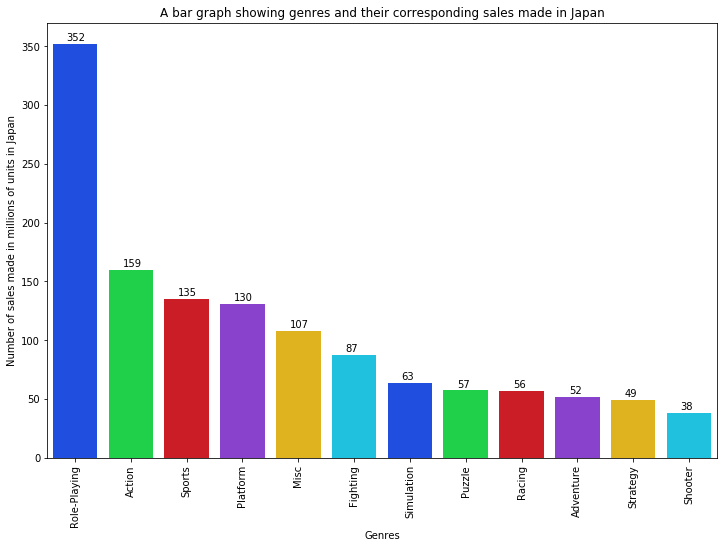

In [27]:
plt.figure(figsize=(12, 8)) 
bar_pl = sns.barplot(x="Genre", y ='JP_Sales', data=vg_sales.groupby(by=['Genre'])['JP_Sales'].sum().reset_index().sort_values(by=['JP_Sales'], ascending=False), palette= 'bright') 

#Shows the angle at which the labels on the x-axis should be displayed
plt.xticks(rotation=90)

for p in bar_pl.patches:
    bar_pl.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
    

plt.title('A bar graph showing genres and their corresponding sales made in Japan')
plt.xlabel('Genres')
plt.ylabel('Number of sales made in millions of units in Japan')

plt.show()

### Role-playing games had the highest unit sales in Japan

In [ ]:
vg_sales.groupby(by=['Genre'])['Other_Sales'].sum().reset_index().sort_values(by=['Other_Sales'], ascending=False)

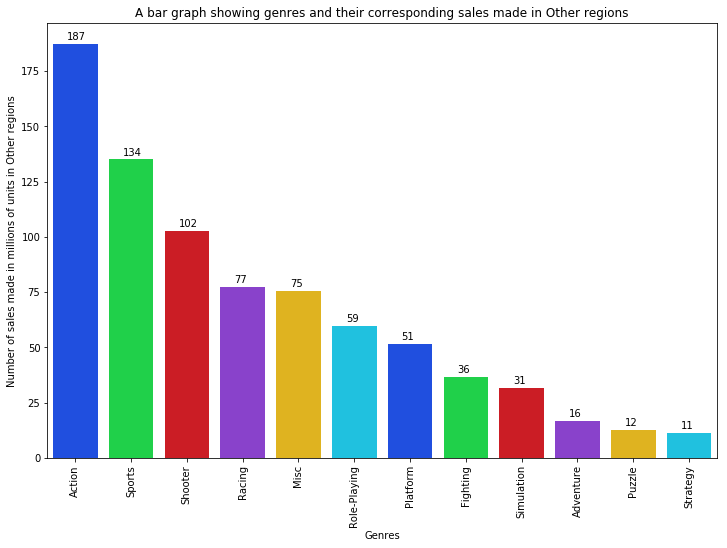

In [28]:
plt.figure(figsize=(12, 8)) 
bar_pl = sns.barplot(x="Genre", y ='Other_Sales', data=vg_sales.groupby(by=['Genre'])['Other_Sales'].sum().reset_index().sort_values(by=['Other_Sales'], ascending=False), palette= 'bright') 

#Shows the angle at which the labels on the x-axis should be displayed
plt.xticks(rotation=90) 

for p in bar_pl.patches:
    bar_pl.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
    

plt.title('A bar graph showing genres and their corresponding sales made in Other regions')
plt.xlabel('Genres')
plt.ylabel('Number of sales made in millions of units in Other regions')

plt.show()

### In all other regions, Action games had the highest sales

### III. WHICH GENRE HAD THE HIGHEST UNIT SALES GLOBALLY?

In [ ]:
vg_sales.groupby(by=['Genre'])['Global_Sales'].sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)


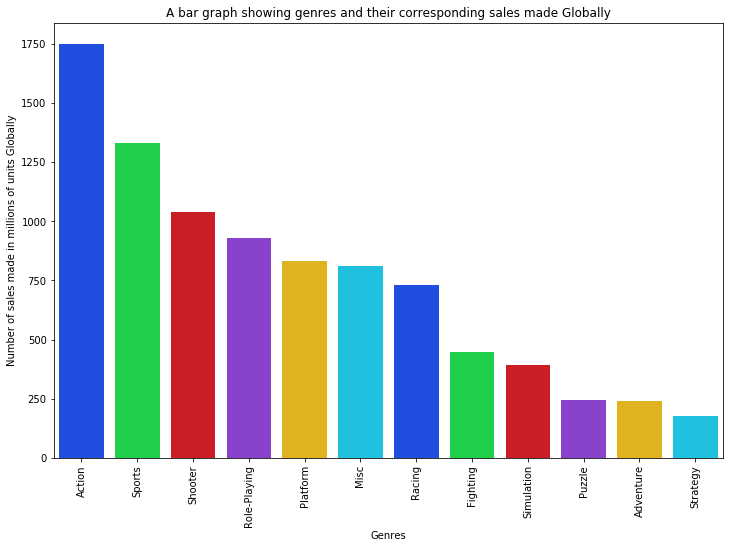

In [29]:
plt.figure(figsize=(12, 8)) 
bar_pl = sns.barplot(x="Genre", y ='Global_Sales', data=vg_sales.groupby(by=['Genre'])['Global_Sales'].sum().reset_index().sort_values(by=['Global_Sales'], ascending=False), palette= 'bright') 

#Shows the angle at which the labels on the x-axis should be displayed
plt.xticks(rotation=90) 

plt.title('A bar graph showing genres and their corresponding sales made Globally')
plt.xlabel('Genres')
plt.ylabel('Number of sales made in millions of units Globally')

plt.show()

### Globally, action games were sold mostly

## A RELATIONSHIP BETWEEN THE GENRES AND UNIT SALES FOR EASY ANALYSIS

In [36]:
vg_sales_Genre=vg_sales["Genre"].dropna().unique()
vg_sales_Genre.sort()

In [32]:
na=[]
eu=[]
jp=[]
other=[]
glbl=[]

for i in vg_sales_Genre:
    x=vg_sales[vg_sales["Genre"]==i]
    
    na.append(sum(x["NA_Sales"]))
    eu.append(sum(x["EU_Sales"]))
    jp.append(sum(x["JP_Sales"]))
    other.append(sum(x["Other_Sales"]))
    glbl.append(sum(x["Global_Sales"]))
 
all_sales_genre=pd.DataFrame({"Genre":vg_sales_Genre, "NA":na, "EU":eu, "JP":jp, "Other":other, "Global":glbl})

all_sales_genre1=pd.DataFrame({"Genre":vg_sales_Genre})

all_sales_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
EU        12 non-null float64
Genre     12 non-null object
Global    12 non-null float64
JP        12 non-null float64
NA        12 non-null float64
Other     12 non-null float64
dtypes: float64(5), object(1)
memory usage: 656.0+ bytes


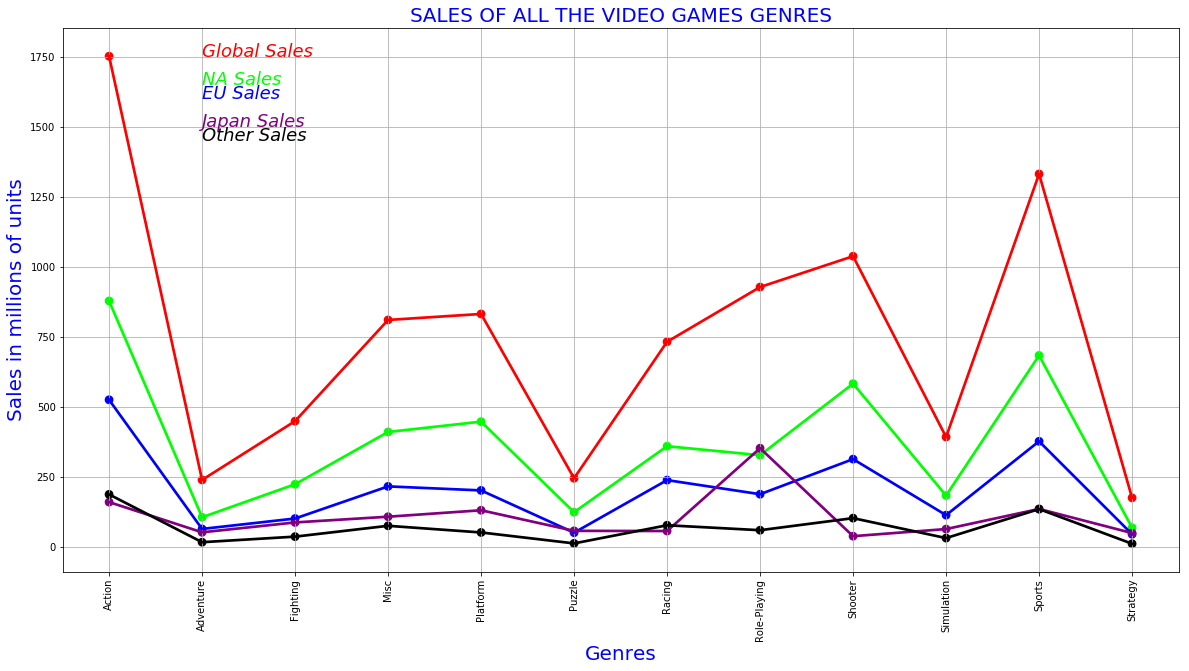

In [55]:
all_sales_genre1["Genre"]=all_sales_genre.Genre.astype("object")

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x="Genre",y="NA" ,data=all_sales_genre,color='lime',alpha=0.8)
sns.pointplot(x="Genre",y="EU",data=all_sales_genre,color='blue',alpha=0.8)
sns.pointplot(x="Genre",y="JP",data=all_sales_genre,color='purple',alpha=0.8)
sns.pointplot(x="Genre",y="Global",data=all_sales_genre,color='red',alpha=0.8)
sns.pointplot(x="Genre",y="Other",data=all_sales_genre,color='black',alpha=0.8)
plt.text(1,1750,'Global Sales',color='red',fontsize = 18,style = 'italic')
plt.text(1,1650,'NA Sales',color='lime',fontsize = 18,style = 'italic')
plt.text(1,1600,'EU Sales',color='blue',fontsize = 18,style = 'italic')
plt.text(1,1500,'Japan Sales',color='purple',fontsize = 18,style = 'italic')
plt.text(1,1450,'Other Sales',color='black',fontsize = 18,style = 'italic')
plt.xticks(rotation=90)
plt.xlabel('Genres',fontsize = 20,color='blue')
plt.ylabel('Sales in millions of units',fontsize = 20,color='blue')
plt.title('SALES OF ALL THE VIDEO GAMES GENRES',fontsize = 20,color='blue')
plt.grid()

## A RELATIONSHIP BETWEEN THE YEARS AND UNIT SALES FOR EASY ANALYSIS

### IV. WHICH YEARS HAD THE HIGHEST ANNUAL SALES?

In [56]:
vg_sales_Year=vg_sales["Year"].dropna().unique()
vg_sales_Year.sort()

In [57]:
na=[]
eu=[]
jp=[]
other=[]
glbl=[]


for i in vg_sales_Year:
    x=vg_sales[vg_sales["Year"]==i]
    
    na.append(sum(x["NA_Sales"]))
    eu.append(sum(x["EU_Sales"]))
    jp.append(sum(x["JP_Sales"]))
    other.append(sum(x["Other_Sales"]))
    glbl.append(sum(x["Global_Sales"]))
 
all_sales_year=pd.DataFrame({"Year":vg_sales_Year, "NA":na, "EU":eu, "JP":jp, "Other":other, "Global":glbl})
all_sales_year["Year"].astype("int64")

all_sales_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 6 columns):
EU        39 non-null float64
Global    39 non-null float64
JP        39 non-null float64
NA        39 non-null float64
Other     39 non-null float64
Year      39 non-null float64
dtypes: float64(6)
memory usage: 1.9 KB


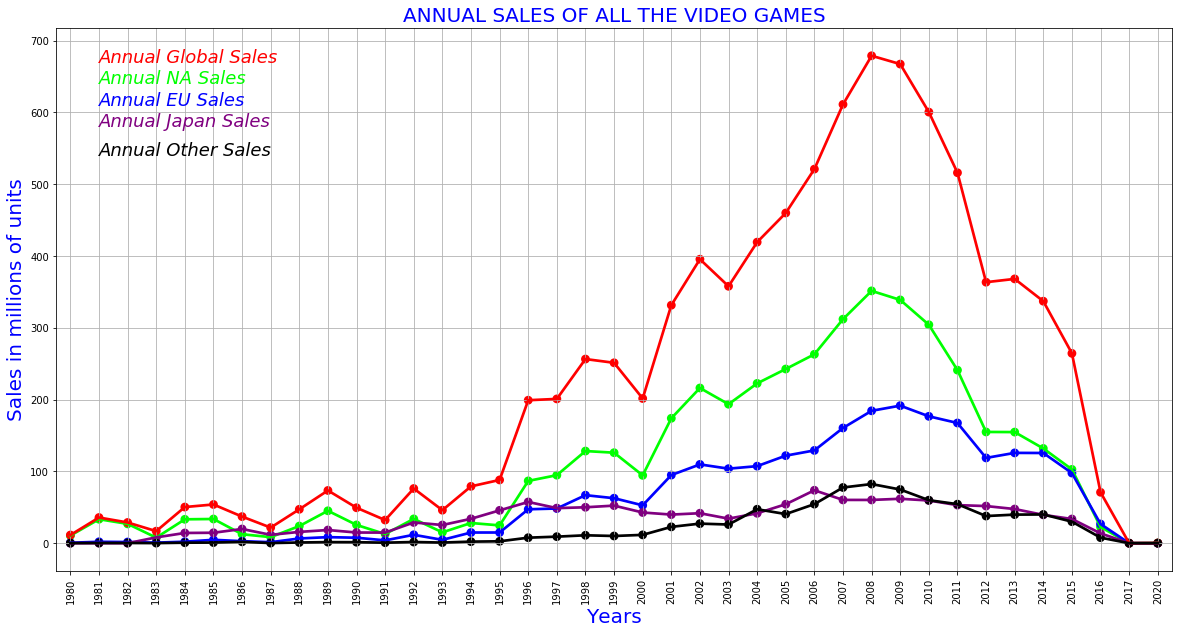

In [58]:
all_sales_year["Year"]=all_sales_year.Year.astype("int64")

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x="Year",y="NA",data=all_sales_year,color='lime',alpha=0.8)
sns.pointplot(x="Year",y="EU",data=all_sales_year,color='blue',alpha=0.8)
sns.pointplot(x="Year",y="JP",data=all_sales_year,color='purple',alpha=0.8)
sns.pointplot(x="Year",y="Global",data=all_sales_year,color='red',alpha=0.8)
sns.pointplot(x="Year",y="Other",data=all_sales_year,color='black',alpha=0.8)
plt.text(1,670,'Annual Global Sales',color='red',fontsize = 18,style = 'italic')
plt.text(1,640,'Annual NA Sales',color='lime',fontsize = 18,style = 'italic')
plt.text(1,610,'Annual EU Sales',color='blue',fontsize = 18,style = 'italic')
plt.text(1,580,'Annual Japan Sales',color='purple',fontsize = 18,style = 'italic')
plt.text(1,540,'Annual Other Sales',color='black',fontsize = 18,style = 'italic')
plt.xticks(rotation=90)
plt.xlabel('Years',fontsize = 20,color='blue')
plt.ylabel('Sales in millions of units',fontsize = 20,color='blue')
plt.title('ANNUAL SALES OF ALL THE VIDEO GAMES',fontsize = 20,color='blue')
plt.grid()

### Globally, the highest annual sales was in the year 2008
### In the year 2008, North America had the highest annual sales
### In the year 2009, Europe had the highest annual sales
### In the year 2006, Japan had the highest annual sales
### Annual sales was highest in the year 2008 for all other regions

## A RELATIONSHIP BETWEEN THE PLATFORMS AND UNIT SALES FOR EASY ANALYSIS

### V. WHICH PLATFORM HAD THE HIGHEST SALES? 


In [41]:
vg_sales_platform=vg_sales["Platform"].dropna().unique()
vg_sales_platform.sort()

In [59]:
na=[]
eu=[]
jp=[]
other=[]
glbl=[]

for i in vg_sales_platform:
    x=vg_sales[vg_sales["Platform"]==i]
    
    na.append(sum(x["NA_Sales"]))
    eu.append(sum(x["EU_Sales"]))
    jp.append(sum(x["JP_Sales"]))
    other.append(sum(x["Other_Sales"]))
    glbl.append(sum(x["Global_Sales"]))
 
all_sales_platform=pd.DataFrame({"Platform":vg_sales_platform, "NA":na, "EU":eu, "JP":jp, "Other":other, "Global":glbl})


all_sales_platform1=pd.DataFrame({"Platform":vg_sales_platform})

all_sales_platform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
EU          31 non-null float64
Global      31 non-null float64
JP          31 non-null float64
NA          31 non-null float64
Other       31 non-null float64
Platform    31 non-null object
dtypes: float64(5), object(1)
memory usage: 1.5+ KB


In [44]:
all_sales_platform1["Platform"]=all_sales_platform.Platform.astype("object")

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x="Platform",y="NA" ,data=all_sales_platform,color='lime',alpha=0.8)
sns.pointplot(x="Platform",y="EU",data=all_sales_platform,color='blue',alpha=0.8)
sns.pointplot(x="Platform",y="JP",data=all_sales_platform,color='purple',alpha=0.8)
sns.pointplot(x="Platform",y="Global",data=all_sales_platform,color='red',alpha=0.8)
sns.pointplot(x="Platform",y="Other",data=all_sales_platform,color='black',alpha=0.8)
plt.text(1,1220,'Global Sales',color='red',fontsize = 18,style = 'italic')
plt.text(1,1100,'NA Sales',color='lime',fontsize = 18,style = 'italic')
plt.text(1,1000,'EU Sales',color='blue',fontsize = 18,style = 'italic')
plt.text(1,900,'Japan Sales',color='purple',fontsize = 18,style = 'italic')
plt.text(1,840,'Other Sales',color='black',fontsize = 18,style = 'italic')
plt.xticks(rotation=90)

plt.xlabel('Platform',fontsize = 20,color='blue')
plt.ylabel('Sales in millions of units',fontsize = 20,color='blue')
plt.title('SALES MADE BY ALL VIDEO GAMES PLATFORMS',fontsize = 20,color='blue')
plt.grid()

### Globally, PS2 had the highest sales, followed by X360, Wii and DS¶
### In NA X360 had the highest sales followed by PS2, Wii and DS
### In EU PS3 had the highest sales followed by PS2, X360 and Wii
### In JP DS had the highest sales followed by PS, PS2 and SNES
### in other regions, PS2 has the highest sales followed by PS3, X360 and Wii

## TOP 15 PUBLISHERS

### VI. WHO WERE THE TOP 15 PUBLISHERS?

In [45]:
top_publisher = vg_sales.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

In [46]:
plt.figure(figsize=(12, 8)) 
pub = sns.countplot(x="Publisher", data=vg_sales, order = vg_sales.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:15].index, palette = "Set1")
plt.xticks(rotation=90)
for p in pub.patches:
    pub.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
    
plt.title('A bar graph showing the ranking of top publishers')
plt.xlabel('Publishers')
plt.ylabel('Number of games released')

Text(0,0.5,'Number of games released')

### Electronic arts was the highest publisher

In [48]:
vg_sales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [49]:
top_twenty = vg_sales['Name'].value_counts(ascending = False).head(20).reset_index().copy()
top_twenty = top_twenty.rename(columns={'index':"Name","Name":"Count"})
top_twenty

,Name,Count
0,Need for Speed: Most Wanted,12
1,Madden NFL 07,9
2,LEGO Marvel Super Heroes,9
3,FIFA 14,9
4,Ratatouille,9
5,Monopoly,8
6,Terraria,8
7,LEGO Harry Potter: Years 5-7,8
8,LEGO Jurassic World,8
9,LEGO The Hobbit,8


In [50]:
top_ten =vg_sales['Publisher'].value_counts(ascending = False).head(10).reset_index().copy()
top_ten = top_ten.rename(columns={'index':"Publisher","Publisher":"Count"})
top_ten

,Publisher,Count
0,Electronic Arts,1409
1,Activision,975
2,Namco Bandai Games,932
3,Ubisoft,921
4,Konami Digital Entertainment,832
5,THQ,715
6,Nintendo,703
7,Sony Computer Entertainment,683
8,Sega,639
9,Take-Two Interactive,413


In [51]:
top_ten = vg_sales['Genre'].value_counts(ascending = False).head(10).reset_index().copy()
top_ten = top_ten.rename(columns={'index':"Genre","Genre":"Count"})
top_ten

,Genre,Count
0,Action,3316
1,Sports,2346
2,Misc,1739
3,Role-Playing,1488
4,Shooter,1310
5,Adventure,1286
6,Racing,1249
7,Platform,886
8,Simulation,867
9,Fighting,848


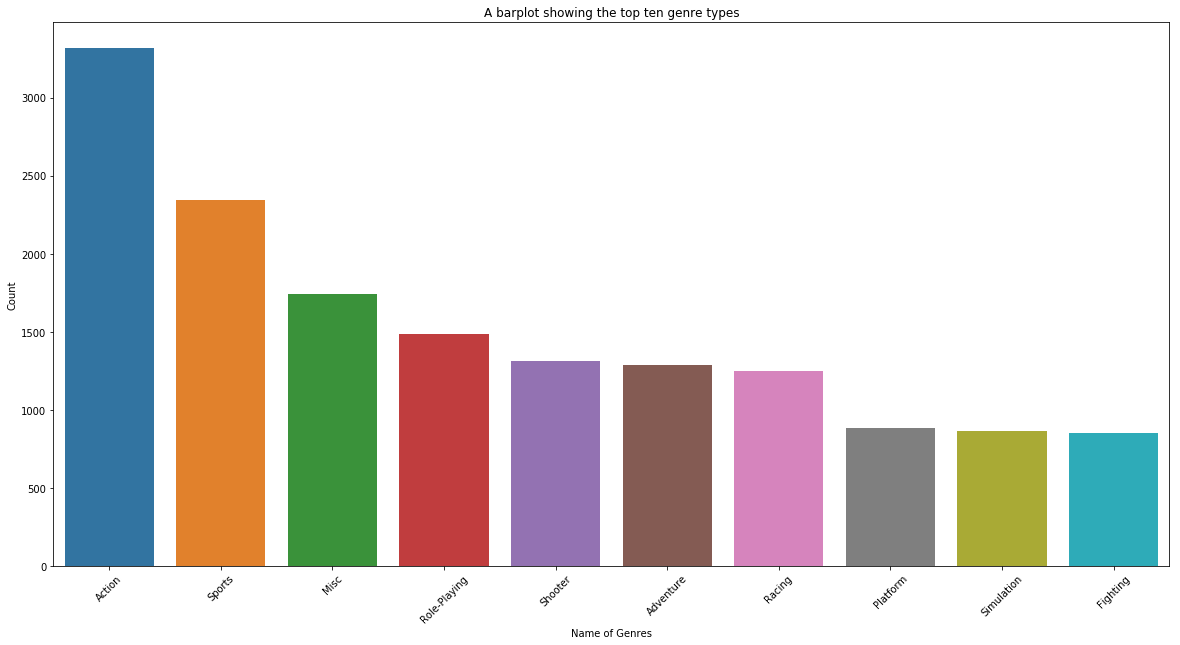

In [60]:
plt.figure(figsize=(20,10))
sns.barplot(x = top_ten['Genre'], y = top_ten['Count'])
plt.xlabel('Name of Genres')
plt.xticks(rotation=45)
plt.title('A barplot showing the top ten genre types');

--

--

In [160]:
#Identifying the top 5 games per genre
top_genres = ['Action', 'Sports', 'Misc','Role-Playing', 'Shooter', 'Adventure', 'Racing', 
              'Platform', 'Simulation',]

def top_10(Genre):
    genre_name = {}
    for i in vg_sales.index:
        if vg_sales['Genre'][i]==genre:
            if vg_sales['Name'][i] in genre_name:
                genre_name[vg_sales['Name'][i]] += 1
            else:
                genre_name[vg_sales['Name'][i]] = 1
    return sorted(genre_name.items(), key=lambda x: x[1], reverse=True)[:5]

In [161]:
for genre in top_genres:
    print('The top five games for {} are:'.format(genre))
    for index in top_10(genre):
        print(index[0])
    print('\n')

The top five games for Action are:
LEGO Marvel Super Heroes
Ratatouille
FIFA Soccer 13
LEGO Star Wars II: The Original Trilogy
LEGO Harry Potter: Years 5-7


The top five games for Sports are:
FIFA 14
Madden NFL 07
FIFA 15
Madden NFL 08
FIFA 12


The top five games for Misc are:
Monopoly
Minecraft
Michael Jackson: The Experience
Just Dance 2014
Just Dance 2015


The top five games for Role-Playing are:
Marvel: Ultimate Alliance
Marvel: Ultimate Alliance 2
Diablo III
Dragon Age: Inquisition
Dark Souls II


The top five games for Shooter are:
Call of Duty: Ghosts
Transformers: Revenge of the Fallen (XBox 360, PS3, & PC Versions)
Call of Duty: Black Ops
Call of Duty: Black Ops 3
Call of Duty: Advanced Warfare


The top five games for Adventure are:
The Walking Dead: Season One
Myst
Minecraft: Story Mode
Bolt
How to Train Your Dragon 2


The top five games for Racing are:
Need for Speed: Most Wanted
Cars
Need for Speed: ProStreet
Need For Speed: Undercover
Need for Speed Carbon


The top f

--

--

# Platform vs Genre

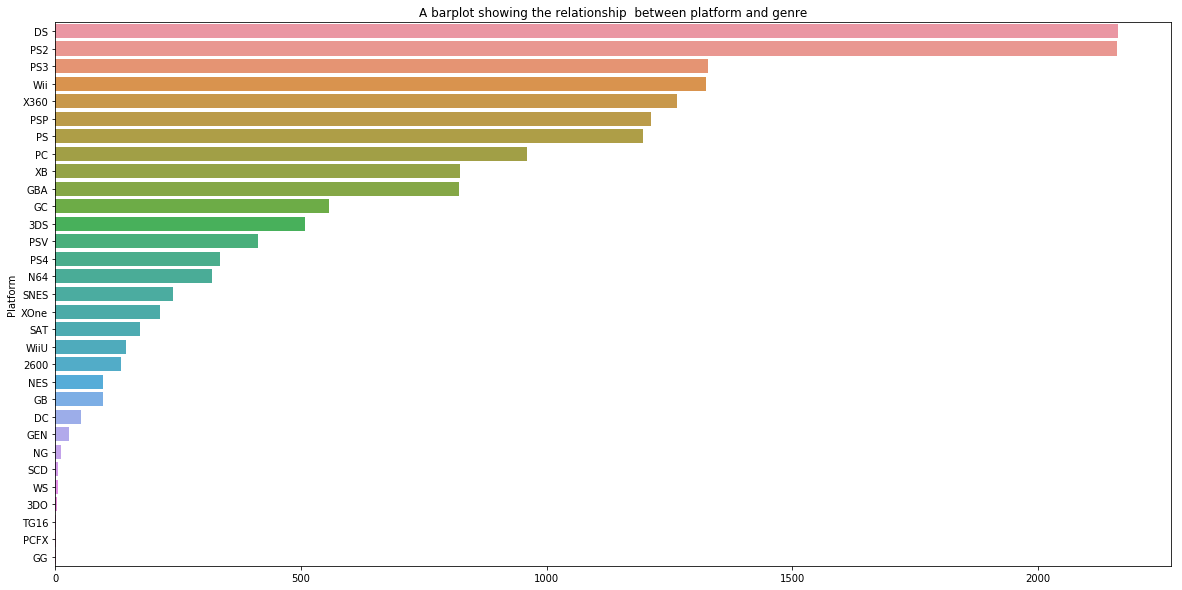

In [67]:
platGenre = pd.crosstab(vg_sales.Platform,vg_sales.Genre)
platGenreTotal = platGenre.sum(axis=1).sort_values(ascending = False)
fig = plt.figure(figsize=(20,10))
sns.barplot(y = platGenreTotal.index, x = platGenreTotal.values, orient='h')
plt.title('A barplot showing the relationship  between platform and genre')
plt.ylabel = "Platform"
plt.xlabel = "The amount of games"
plt.show()
plt.savefig('platform_and_genre.jpeg');

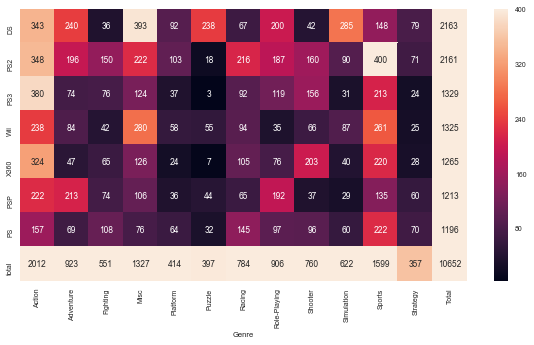

In [68]:
platGenre['Total'] = platGenre.sum(axis=1)
popPlatform = platGenre[platGenre['Total']>1000].sort_values(by='Total', ascending = False)
neededdata = popPlatform.loc[:,:'Strategy']
maxi = neededdata.values.max()
mini = neededdata.values.min()
popPlatformfinal = popPlatform.append(pd.DataFrame(popPlatform.sum(), columns=['total']).T, ignore_index=False)
sns.set(font_scale=0.7)
plt.figure(figsize=(10,5))
sns.heatmap(popPlatformfinal, vmin = mini, vmax = maxi, annot=True, fmt="d")
plt.xticks(rotation = 90)
plt.show()

### So, you can see the popular genre game of DS, PS2 and PS3. 

And we also can get each genre of game sales in every area by groupby. And we will show you the absolute data and the percentage in the same time.

--

--

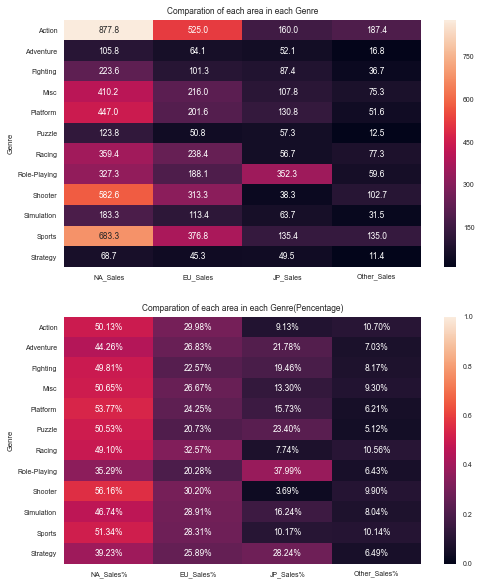

In [69]:
GenreGroup = vg_sales.groupby(['Genre']).sum().loc[:, 'NA_Sales':'Global_Sales']
GenreGroup['NA_Sales%'] = GenreGroup['NA_Sales']/GenreGroup['Global_Sales']
GenreGroup['EU_Sales%'] = GenreGroup['EU_Sales']/GenreGroup['Global_Sales']
GenreGroup['JP_Sales%'] = GenreGroup['JP_Sales']/GenreGroup['Global_Sales']
GenreGroup['Other_Sales%'] = GenreGroup['Other_Sales']/GenreGroup['Global_Sales']
plt.figure(figsize=(8, 10))
sns.set(font_scale=0.7)
plt.subplot(211)
sns.heatmap(GenreGroup.loc[:, 'NA_Sales':'Other_Sales'], annot=True, fmt = '.1f')
plt.title("Comparation of each area in each Genre")
plt.subplot(212)
sns.heatmap(GenreGroup.loc[:,'NA_Sales%':'Other_Sales%'], vmax =1, vmin=0, annot=True, fmt = '.2%')
plt.title("Comparation of each area in each Genre(Pencentage)")
plt.show()

--

--

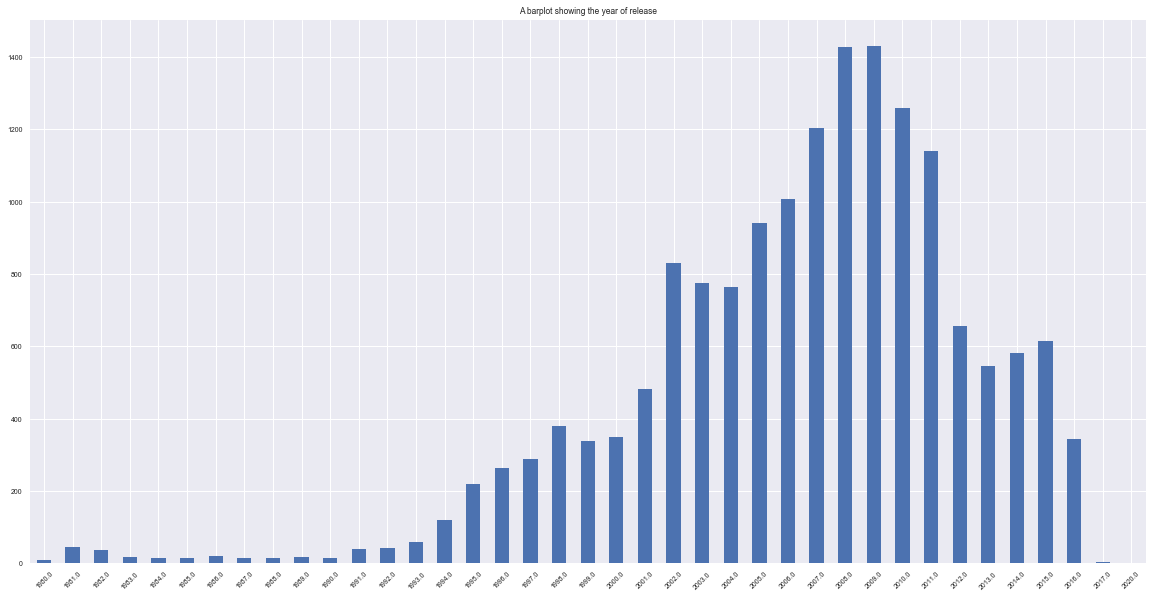

In [71]:
plt.figure(figsize=(20,10))
vg_sales.Year.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('A barplot showing the year of release');

## From this we gather that the rise in videogames started from 1993 to 1994. This rise continued and peaked in 2008 and 2009. The following years (from 2010 to 2020) saw a fall in videogames.

--

--

In [72]:
# getting the each unique year in the dataframe videogames
uniqueYears = vg_sales.Year.unique()

# making a dictionary of dataframes to store each dataframe
dataFrameDict = {elem : pd.DataFrame for elem in uniqueYears}

# getting the dataframe for each entered year 
for key in dataFrameDict.keys():
    dataFrameDict[key] = vg_sales[:][vg_sales.Year == key]


# By doing this, we will be able to get the sales for each year and see how they compare across
# the US, Europe, and Japan

df1999 = dataFrameDict[1999]
df2016 = dataFrameDict[2016]
df2000 = dataFrameDict[2000]

### ** Using the dataFrameDict above, we can retreive a dataframe containing all the information for each individual year, from this we can compare how the worth of videogames has changed over time, is the industry making more money now than they were in 1980? 1999-2000 and 2016 are good years to compare because they had similar number of games sold.**

--

--

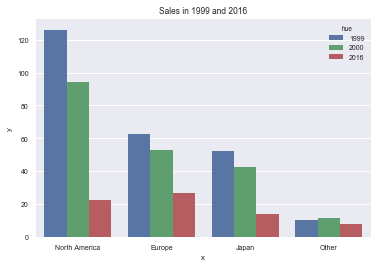

In [73]:
df1 = pd.DataFrame({'x': ['North America', 'Europe', 'Japan', 'Other'], 'y': [df1999.NA_Sales.sum(), 
                                                                             df1999.EU_Sales.sum(), 
                                                                             df1999.JP_Sales.sum(), 
                                                                             df1999.Other_Sales.sum()]})
df2 = pd.DataFrame({'x':['North America', 'Europe', 'Japan', 'Other'], 'y': [df2016.NA_Sales.sum(), 
                                                                            df2016.EU_Sales.sum(), 
                                                                            df2016.JP_Sales.sum(),
                                                                            df2016.Other_Sales.sum()]})
df3 = pd.DataFrame({'x': ['North America', 'Europe', 'Japan', 'Other'], 'y': [df2000.NA_Sales.sum(), 
                                                                             df2000.EU_Sales.sum(), 
                                                                             df2000.JP_Sales.sum(), 
                                                                             df2000.Other_Sales.sum()]})
df1['hue']=1999
df2['hue']=2016
df3['hue']=2000
res=pd.concat([df1,df3, df2])
sns.barplot(x='x', y='y', data=res, hue='hue')
plt.title('Sales in 1999 and 2016')
plt.show()

### **This is interesing - 1999 had 338 game titles, 2000 had 349 game titles, and 2016 had 342 game titles. 1999 has the lowest number of game titles yet the highest dollar amount in millions of sales. So can we conclude that the videogames were a lot more valuable in 1999 and became less and less valuable as time went on?

--

--

## Find the total sales for each region

In [75]:
#Game sales market
NA = vg_sales['NA_Sales'].sum()
JP = vg_sales['JP_Sales'].sum()
EU = vg_sales['EU_Sales'].sum()
OS = vg_sales['Other_Sales'].sum()

In [76]:
print(f'Total Sales in North America = {NA}')
print('\n')
print(f'Total Sales in Japan = {JP}')
print('\n')
print(f'Total Sales in Europe = {EU}')
print('\n')
print(f'Total Sales in Other Territories = {OS}')
print('\n')

Total Sales in North America = 4392.950000000332


Total Sales in Japan = 1291.0199999999018


Total Sales in Europe = 2434.13000000055


Total Sales in Other Territories = 797.7499999998826




--

--

## Market share per region (Pie Chart)


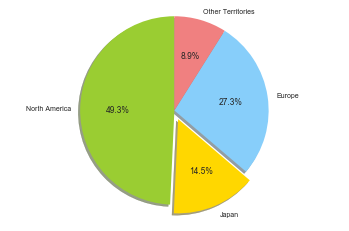

In [77]:
#pie chart
# The slices will be ordered and plotted counter-clockwise.
labels = 'North America', 'Japan', 'Europe', 'Other Territories'
sizes = [NA, JP, EU, OS]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(x=sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')



plt.show()

--

--

## Most popular Platform

In [ ]:
vg_sales['Genre'].value_counts()

--

--

## Filter only PS4 and XOne

In [99]:
ps4_xone = vg_sales.loc[vg_sales['Platform'].isin(['PS4','XOne'])]

--

--

## Top 100 publishers

In [100]:
publish = vg_sales['Publisher'].value_counts().head(100)
publish

Electronic Arts                           1409
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Midway Games                               198
Eidos Interactive                          198
505 Games                                  192
Microsoft Game Studios                     189
D3Publisher  

--

--

## PS4 XOne Filtered

In [101]:
ps4_xone

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
93,94,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,Activision,2.80,3.30,0.14,1.37,7.60
101,102,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,4.52,2.09,0.01,0.67,7.30
109,110,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96
124,125,FIFA 15,PS4,2014.0,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.59
154,155,Destiny,PS4,2014.0,Shooter,Activision,2.49,2.05,0.16,0.96,5.65
193,194,Call of Duty: Advanced Warfare,XOne,2014.0,Shooter,Activision,3.21,1.53,0.01,0.38,5.13


--

--

## PS4 + Xbox ONE Total Global sales

In [102]:
TS = ps4_xone['Global_Sales'].sum()
TS

419.15999999999934

--

--

## Filter Only PS4

In [163]:
ps4 = vg_sales.loc[vg_sales['Platform'].isin(['PS4'])]
ps4

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
93,94,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,Activision,2.80,3.30,0.14,1.37,7.60
109,110,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96
124,125,FIFA 15,PS4,2014.0,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.59
154,155,Destiny,PS4,2014.0,Shooter,Activision,2.49,2.05,0.16,0.96,5.65
221,222,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77
236,237,The Last of Us,PS4,2014.0,Action,Sony Computer Entertainment,1.78,1.87,0.07,0.82,4.55


--

--

## PS4 TOTAL GLOBAL SALES

In [164]:
Ps4_Gsales = ps4['Global_Sales'].sum()
Ps4_Gsales

278.0999999999994

--

--

## FILTER ONLY XBOX ONE

In [165]:
xone = vg_sales.loc[vg_sales['Platform'].isin(['XOne'])]
xone

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
101,102,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,4.52,2.09,0.01,0.67,7.30
193,194,Call of Duty: Advanced Warfare,XOne,2014.0,Shooter,Activision,3.21,1.53,0.01,0.38,5.13
197,198,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08
260,261,Halo 5: Guardians,XOne,2015.0,Shooter,Microsoft Game Studios,2.64,1.20,0.03,0.39,4.26
287,288,Fallout 4,XOne,2015.0,Role-Playing,Bethesda Softworks,2.45,1.26,0.01,0.37,4.09
378,379,Star Wars Battlefront (2015),XOne,2015.0,Shooter,Electronic Arts,1.94,1.22,0.02,0.31,3.49
381,382,Assassin's Creed: Unity,XOne,2014.0,Action,Ubisoft,2.26,0.89,0.00,0.30,3.46
410,411,Destiny,XOne,2014.0,Shooter,Activision,2.13,0.92,0.00,0.23,3.28
416,417,FIFA 16,XOne,2015.0,Sports,Electronic Arts,0.88,2.11,0.00,0.23,3.23
439,440,Halo: The Master Chief Collection,XOne,2014.0,Shooter,Microsoft Game Studios,1.89,0.99,0.03,0.24,3.15


--

--

## XBOX ONE TOTAL GLOBAL SALES

In [166]:
xone_GS = xone['Global_Sales'].sum()
xone_GS

141.05999999999995

--

--

## PS4 vs XBOX ONE (VIDEO GAME SALES COMPARISON)

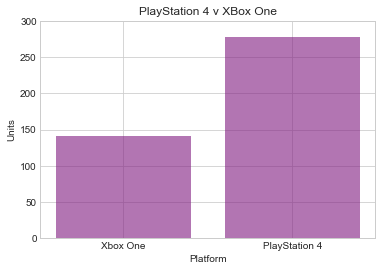

In [4]:
#PS4 Sales vs XOne
height = [141, 278]
bars = ('Xbox One', 'PlayStation 4')
y_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('PlayStation 4 v XBox One')
plt.xlabel('Platform')
plt.ylabel('Units')
 
# Limits for the Y axis
plt.ylim(0,300)
 
# Create names
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

--

--

## SUM VIDEO GAME SALES FOR ALL REGIONS. (XBOX AND PS4 )

In [111]:
NA_X1 = xone['NA_Sales'].sum() #total xbox north america sales
JP_X1 = xone['JP_Sales'].sum() #total xbox Japan sales
EU_X1 = xone['EU_Sales'].sum() #total xbox Europe sales
OS_X1 = xone['Other_Sales'].sum() #total xbox Other territories sales
NA_PS4 = ps4['NA_Sales'].sum() #total ps4 north america sales
JP_PS4 = ps4['JP_Sales'].sum() ##total ps4 Japan sales
EU_PS4 = ps4['EU_Sales'].sum() #total ps4 Europe sales
OS_PS4 = ps4['Other_Sales'].sum() ##total ps4 Other territories sales

--

--

## Breakdown of sales by region for Xbox One (Pie Chart)

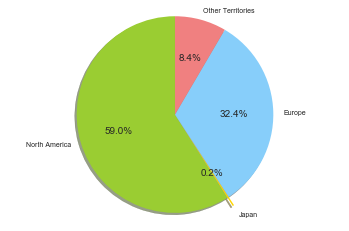

In [115]:
#breakdown of sales by territory for XOne
# The slices will be ordered and plotted counter-clockwise.
labels = 'North America', 'Japan', 'Europe', 'Other Territories' #Other sales = Other Territories = Other Region
sizes = [NA_X1, JP_X1, EU_X1, OS_X1]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(x=sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')



plt.show()

--

--

## Breakdown of sales by region for PS4 (Pie Chart)

In [ ]:
#breakdown of sales by territory for PS4
# The slices will be ordered and plotted counter-clockwise.
labels = 'North America', 'Japan', 'Europe', 'Other Territories'
sizes = [NA_PS4, JP_PS4, EU_PS4, OS_PS4]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(x=sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')



plt.show()

--

--

## Filter out the top 10 publishers

In [ ]:
p_sales = vg_sales.loc[vg_sales['Publisher'].isin(['Electronic Arts','Activision','Namco Bandai Games', 'Ubisoft', 'Konami Digital Entertainment', 
           'THQ', 'Nintendo', 'Sony Computer Entertainment', 'Sega', 'Take-Two Interactive'])]

## Top 10 publishers data set

In [116]:
total_titles = {'Publisher': ['Electronic Arts','Activision', 'Namco Bandai Games','Ubisoft', 'Konami Digital Entertainment', 
               'THQ', 'Nintendo', 'Sony Computer Entertainment', 'Sega', 'Take-Two Interactive'],
                'Number of titles': [1351, 975, 932, 921, 832,715,703,683,639,413]
                }

game_makers = pd.DataFrame(total_titles, columns = ['Publisher', 'Number of titles'])

--

--

## Top 10 publishers bar chart¶

In [ ]:
game_makers.plot(kind='bar',x='Publisher',y='Number of titles', title = 'Top 10 Game Publishers')

--

--

## Filter 10 top publishers

In [120]:
EA = vg_sales.loc[vg_sales['Publisher'].isin(['Electronic Arts'])]
Act = vg_sales.loc[vg_sales['Publisher'].isin(['Activision'])]
NBG = vg_sales.loc[vg_sales['Publisher'].isin(['Namco Bandai Games'])]
Usoft = vg_sales.loc[vg_sales['Publisher'].isin(['Ubisoft'])]
Konami = vg_sales.loc[vg_sales['Publisher'].isin(['Konami Digital Entertainment'])]
thq = vg_sales.loc[vg_sales['Publisher'].isin(['THQ'])]
nintendo = vg_sales.loc[vg_sales['Publisher'].isin(['Nintendo'])]
sony = vg_sales.loc[vg_sales['Publisher'].isin(['Sony Computer Entertainment'])]
sega = vg_sales.loc[vg_sales['Publisher'].isin(['Sega'])]
Take_2 = vg_sales.loc[vg_sales['Publisher'].isin(['Take-Two Interactive'])]



--

--

## Sum of global sales of top 10 publishers

In [121]:
EA_sum = EA['Global_Sales'].sum()
Act_sum = Act['Global_Sales'].sum()
NBG_sum = NBG['Global_Sales'].sum()
Usoft_sum = Usoft['Global_Sales'].sum()
Konami_sum = Konami['Global_Sales'].sum()
thq_sum = thq['Global_Sales'].sum()
nintendo_sum = nintendo['Global_Sales'].sum()
sony_sum = sony['Global_Sales'].sum()
sega_sum = sega['Global_Sales'].sum()
Take_2_sum = Take_2['Global_Sales'].sum()


--

--

## Sum of regional sales for top 10 publishers

In [122]:
#EA sales by region
E_NA = EA['NA_Sales'].sum()
E_JP = EA['JP_Sales'].sum()
E_EU = EA['EU_Sales'].sum()
E_OS = EA['Other_Sales'].sum()

In [123]:
#Activision sales by region
Act_NA = Act['NA_Sales'].sum()
Act_JP = Act['JP_Sales'].sum()
Act_EU = Act['EU_Sales'].sum()
Act_OS = Act['Other_Sales'].sum()

In [124]:
#Namco Bandai sales by region
NBG_NA = NBG['NA_Sales'].sum()
NBG_JP = NBG['JP_Sales'].sum()
NBG_EU = NBG['EU_Sales'].sum()
NBG_OS = NBG['Other_Sales'].sum()

In [125]:
#Ubisoft sales by region
Usoft_NA = Usoft['NA_Sales'].sum()
Usoft_JP = Usoft['JP_Sales'].sum()
Usoft_EU = Usoft['EU_Sales'].sum()
Usoft_OS = Usoft['Other_Sales'].sum()

In [126]:
#KONAMI sales by region
Konami_NA = Konami['NA_Sales'].sum()
Konami_JP = Konami['JP_Sales'].sum()
Konami_EU = Konami['EU_Sales'].sum()
Konami_OS = Konami['Other_Sales'].sum()

In [127]:
#thq sales by region
thq_NA = thq['NA_Sales'].sum()
thq_JP = thq['JP_Sales'].sum()
thq_EU = thq['EU_Sales'].sum()
thq_OS = thq['Other_Sales'].sum()

In [128]:
#Nintendo sales by region
nintendo_NA = nintendo['NA_Sales'].sum()
nintendo_JP = nintendo['JP_Sales'].sum()
nintendo_EU = nintendo['EU_Sales'].sum()
nintendo_OS = nintendo['Other_Sales'].sum()

In [129]:
#Sony sales by region
sony_NA = sony['NA_Sales'].sum()
sony_JP = sony['JP_Sales'].sum()
sony_EU = sony['EU_Sales'].sum()
sony_OS = sony['Other_Sales'].sum()

In [130]:
#Sega sales by region
sega_NA = sega['NA_Sales'].sum()
sega_JP = sega['JP_Sales'].sum()
sega_EU = sega['EU_Sales'].sum()
sega_OS = sega['Other_Sales'].sum()

In [131]:
#Take 2 interactive sales by region
Take_2_NA = Take_2['NA_Sales'].sum()
Take_2_JP = Take_2['JP_Sales'].sum()
Take_2_EU = Take_2['EU_Sales'].sum()
Take_2_OS = Take_2['Other_Sales'].sum()

In [132]:
print (EA_sum, Act_sum, NBG_sum, Usoft_sum, Konami_sum, thq_sum, nintendo_sum, sony_sum,sega_sum, Take_2_sum)

1125.199999999988 727.4599999999983 254.0900000000008 474.71999999999935 283.639999999998 340.7699999999994 1786.5599999999981 607.4999999999989 272.98999999999927 399.5399999999996


## Regional plots (Pie Chart)

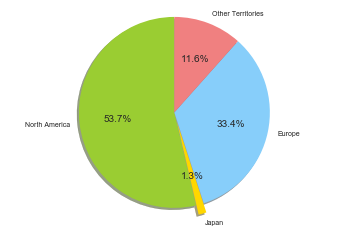

In [133]:
#breakdown of EA sales by territory
# The slices will be ordered and plotted counter-clockwise.
labels = 'North America', 'Japan', 'Europe', 'Other Territories'
sizes = [E_NA, E_JP, E_EU, E_OS]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(x=sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')



plt.show()

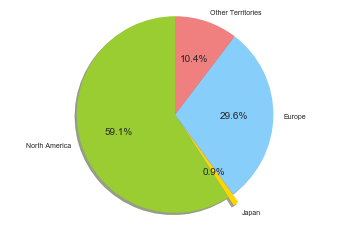

In [134]:
#breakdown of Activision sales by territory
# The slices will be ordered and plotted counter-clockwise.
labels = 'North America', 'Japan', 'Europe', 'Other Territories'
sizes = [Act_NA, Act_JP, Act_EU, Act_OS]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(x=sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')



plt.show()

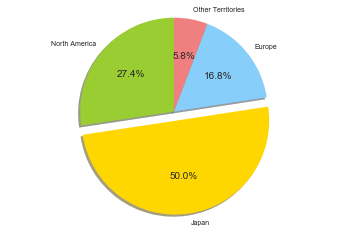

In [135]:
#breakdown of Namco Bandai sales by territory
# The slices will be ordered and plotted counter-clockwise.
labels = 'North America', 'Japan', 'Europe', 'Other Territories'
sizes = [NBG_NA, NBG_JP, NBG_EU, NBG_OS]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(x=sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')



plt.show()

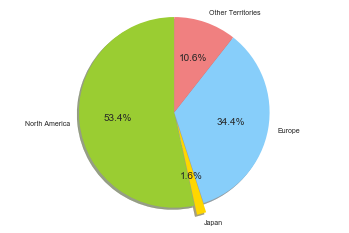

In [136]:
#breakdown of Ubisoft sales by territory
# The slices will be ordered and plotted counter-clockwise.
labels = 'North America', 'Japan', 'Europe', 'Other Territories'
sizes = [Usoft_NA, Usoft_JP, Usoft_EU, Usoft_OS]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(x=sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')



plt.show()

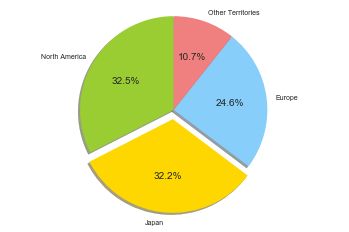

In [137]:
#breakdown of Konami sales by territory
# The slices will be ordered and plotted counter-clockwise.
labels = 'North America', 'Japan', 'Europe', 'Other Territories'
sizes = [Konami_NA, Konami_JP, Konami_EU, Konami_OS]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(x=sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')



plt.show()

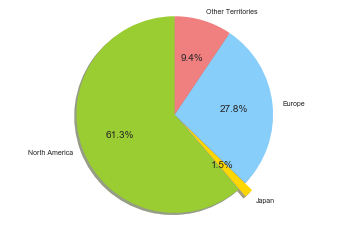

In [138]:
#breakdown of THQ sales by territory
# The slices will be ordered and plotted counter-clockwise.
labels = 'North America', 'Japan', 'Europe', 'Other Territories'
sizes = [thq_NA, thq_JP, thq_EU, thq_OS]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(x=sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')



plt.show()

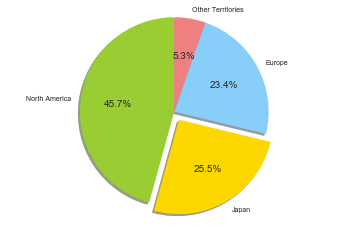

In [139]:
#breakdown of Nintendo sales by territory
# The slices will be ordered and plotted counter-clockwise.
labels = 'North America', 'Japan', 'Europe', 'Other Territories'
sizes = [nintendo_NA, nintendo_JP, nintendo_EU, nintendo_OS]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(x=sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')



plt.show()

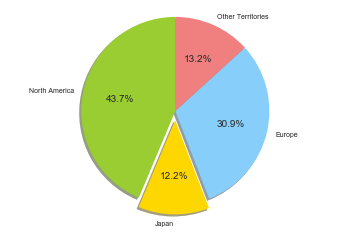

In [140]:
#breakdown of Sony sales by territory
# The slices will be ordered and plotted counter-clockwise.
labels = 'North America', 'Japan', 'Europe', 'Other Territories'
sizes = [sony_NA, sony_JP, sony_EU, sony_OS]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(x=sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')



plt.show()

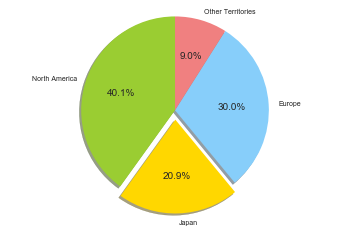

In [141]:
#breakdown of Sega sales by territory
# The slices will be ordered and plotted counter-clockwise.
labels = 'North America', 'Japan', 'Europe', 'Other Territories'
sizes = [sega_NA, sega_JP, sega_EU, sega_OS]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(x=sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')



plt.show()

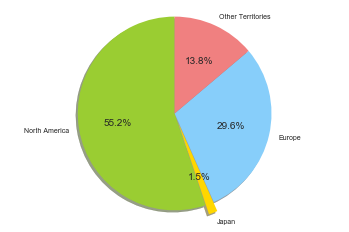

In [142]:
#breakdown of Take-2-Interactive sales by territory
# The slices will be ordered and plotted counter-clockwise.
labels = 'North America', 'Japan', 'Europe', 'Other Territories'
sizes = [Take_2_NA, Take_2_JP, Take_2_EU, Take_2_OS]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(x=sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')



plt.show()

--

--

In [ ]:
for feature in year_feature:
    if feature =='Year':
        data=vg_sales.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['Year']
        plt.scatter(data[feature],data['Global_Sales'])
        plt.xlabel(feature)
        plt.ylabel('Global_Sales')
        plt.show()

--

--

In [144]:
# correlation of numeric features with Global Sales
correlation = numfeat.corr()
print(correlation['Global_Sales'].sort_values(ascending = False),'\n')

Global_Sales    1.000000
NA_Sales        0.941047
EU_Sales        0.902836
Other_Sales     0.748331
JP_Sales        0.611816
Year           -0.074735
Rank           -0.427407
Name: Global_Sales, dtype: float64 



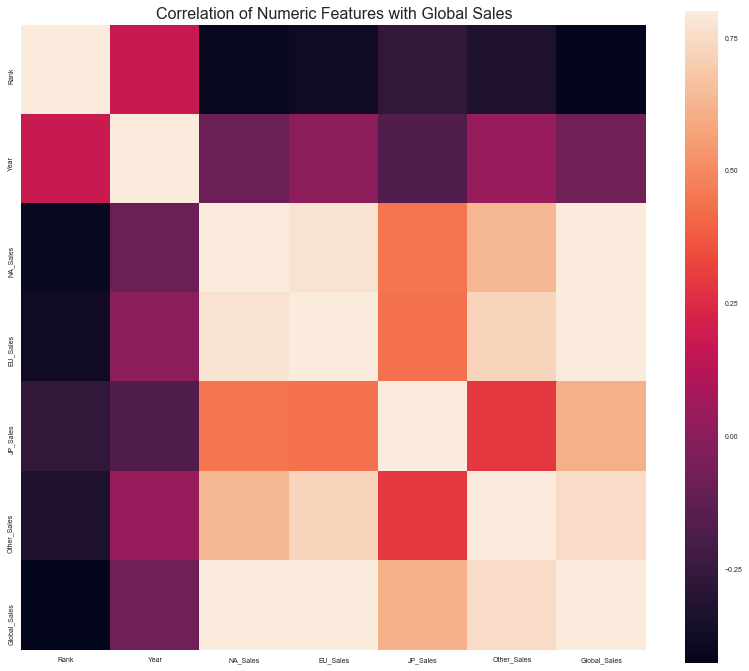

In [145]:
#correlation Heat Map
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with Global Sales',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

--

--

Index(['Global_Sales', 'NA_Sales', 'EU_Sales', 'Other_Sales', 'JP_Sales',
       'Year', 'Rank'],
      dtype='object')


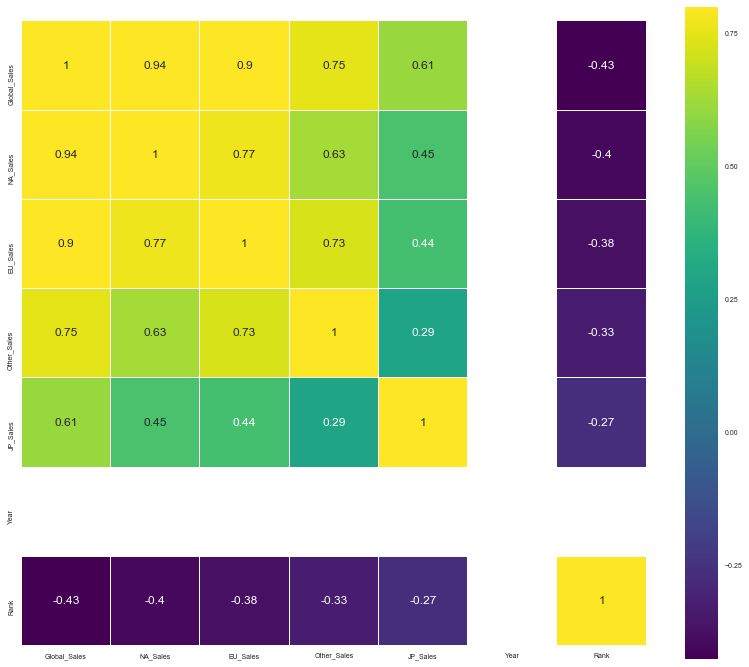

In [147]:
# heatmap correlation
k= 11
cols = correlation.nlargest(k,'Global_Sales')['Global_Sales'].index
print(cols)
cm = np.corrcoef(vg_sales[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

--

--

In [ ]:
# relationship between catfeat abd dependent feature sales price
for feature in catfeat:
    data=vg_sales.copy()
    data.groupby(feature)['Global_Sales'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Global_Sales')
    plt.title(feature)
    plt.show()

TypeError: 'str' object is not callable